<a href="https://colab.research.google.com/github/MinJunJA/babymodel/blob/master/crnn%EC%88%98%EC%A0%95_%2B_Transformers%EC%8B%9C%EB%8F%84_%2B_%EB%A9%9C_%EC%8A%A4%ED%8E%99%ED%8A%B8%EB%A1%9C%EA%B7%B8%EB%9E%A8_%EB%B6%84%EC%84%9D_%EC%8B%9C%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#CRNN
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Reshape

# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying/sample2'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 12

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

#모델생성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Reshape((X_train.shape[1] // 8, (X_train.shape[2] // 8) * 128)))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#CRNN
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Reshape

# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying/sample2'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 12

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

#모델생성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Reshape((X_train.shape[1] // 8, (X_train.shape[2] // 8) * 128)))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)


model.save('/content/drive/MyDrive/babymodel/crnn_model.h5')

Epoch 1/100
131/131 [==============================] - 6s 15ms/step - loss: 1.6102 - accuracy: 0.2261 - val_loss: 1.6026 - val_accuracy: 0.2441
Epoch 2/100
131/131 [==============================] - 2s 12ms/step - loss: 1.5882 - accuracy: 0.2545 - val_loss: 1.5683 - val_accuracy: 0.2829
Epoch 3/100
131/131 [==============================] - 2s 12ms/step - loss: 1.5462 - accuracy: 0.3014 - val_loss: 1.4884 - val_accuracy: 0.3413
Epoch 4/100
131/131 [==============================] - 1s 9ms/step - loss: 1.5039 - accuracy: 0.3331 - val_loss: 1.4530 - val_accuracy: 0.3888
Epoch 5/100
131/131 [==============================] - 1s 9ms/step - loss: 1.4750 - accuracy: 0.3658 - val_loss: 1.4680 - val_accuracy: 0.3737
Epoch 6/100
131/131 [==============================] - 1s 8ms/step - loss: 1.4499 - accuracy: 0.3828 - val_loss: 1.4395 - val_accuracy: 0.3888
Epoch 7/100
131/131 [==============================] - 1s 8ms/step - loss: 1.4180 - accuracy: 0.3989 - val_loss: 1.3807 - val_accuracy: 0.4

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import RepeatVector


# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying/sample2'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 12

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 사전 학습된 CRNN 모델 로드 (저장된 모델 경로에 맞게 수정해주세요)
pretrained_model_path = '/content/drive/MyDrive/babymodel/crnn_model.h5'
pretrained_model = load_model(pretrained_model_path)

# 마지막 LSTM 레이어 변경 (전체 모델 아키텍처를 재구성하는 것이 아닌 마지막 부분만 수정)
lstm_output = pretrained_model.layers[-2].output  # 뒤에서 두 번째 레이어를 가져옴
x = RepeatVector(max_length)(lstm_output)  # 3D 텐서로 변환
x = TimeDistributed(Dense(128))(x)
x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64)(x)
output = Dense(num_classes, activation='softmax')(x)

# 새로운 모델 생성
new_model = Model(inputs=pretrained_model.input, outputs=output)

# 모델 컴파일
new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
new_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = new_model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

# 변환 학습 모델을 h5 파일로 저장
saved_model_path = '/content/drive/MyDrive/babymodel/trans.h5'
new_model.save(saved_model_path)
print("Model saved at:", saved_model_path)

Epoch 1/100
131/131 [==============================] - 12s 30ms/step - loss: 0.3370 - accuracy: 0.9072 - val_loss: 1.7763 - val_accuracy: 0.5248
Epoch 2/100
131/131 [==============================] - 2s 16ms/step - loss: 0.1954 - accuracy: 0.9404 - val_loss: 1.9678 - val_accuracy: 0.5356
Epoch 3/100
131/131 [==============================] - 3s 22ms/step - loss: 0.1690 - accuracy: 0.9471 - val_loss: 2.2243 - val_accuracy: 0.4989
Epoch 4/100
131/131 [==============================] - 2s 19ms/step - loss: 0.1911 - accuracy: 0.9411 - val_loss: 2.1027 - val_accuracy: 0.5097
Epoch 5/100
131/131 [==============================] - 2s 15ms/step - loss: 0.1799 - accuracy: 0.9361 - val_loss: 2.1915 - val_accuracy: 0.5184
Epoch 6/100
131/131 [==============================] - 2s 16ms/step - loss: 0.1567 - accuracy: 0.9527 - val_loss: 2.1968 - val_accuracy: 0.5356
Epoch 7/100
131/131 [==============================] - 2s 15ms/step - loss: 0.2393 - accuracy: 0.9260 - val_loss: 2.0107 - val_accuracy

In [ ]:
#CRNN2
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Reshape

# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying/sample2'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 12

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 모델 생성
model = Sequential()

# Convolutional Layer 추가
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # BatchNormalization 추가

# Convolutional Layer 추가
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # BatchNormalization 추가

# Convolutional Layer 추가
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(BatchNormalization())  # BatchNormalization 추가

model.add(Flatten())

# LSTM 레이어 변경
model.add(Reshape((X_train.shape[1] // 8, (X_train.shape[2] // 8) * 256)))  # Reshape 추가
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))

# Output 레이어 변경
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

# 모델 저장
model.save('/content/drive/MyDrive/babymodel/crnn_model_modified.h5')


Epoch 1/100
131/131 [==============================] - 11s 27ms/step - loss: 1.5058 - accuracy: 0.3420 - val_loss: 1.5255 - val_accuracy: 0.3197
Epoch 2/100
131/131 [==============================] - 2s 14ms/step - loss: 1.4106 - accuracy: 0.4191 - val_loss: 1.4771 - val_accuracy: 0.3434
Epoch 3/100
131/131 [==============================] - 1s 11ms/step - loss: 1.3407 - accuracy: 0.4509 - val_loss: 1.3293 - val_accuracy: 0.4665
Epoch 4/100
131/131 [==============================] - 1s 11ms/step - loss: 1.2796 - accuracy: 0.4850 - val_loss: 1.4867 - val_accuracy: 0.3866
Epoch 5/100
131/131 [==============================] - 1s 11ms/step - loss: 1.2122 - accuracy: 0.5242 - val_loss: 1.3111 - val_accuracy: 0.4687
Epoch 6/100
131/131 [==============================] - 1s 11ms/step - loss: 1.1509 - accuracy: 0.5460 - val_loss: 1.2102 - val_accuracy: 0.5054
Epoch 7/100
131/131 [==============================] - 1s 11ms/step - loss: 1.0817 - accuracy: 0.5905 - val_loss: 1.1002 - val_accuracy

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, Reshape
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import RepeatVector
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import tensorflow as tf


# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying/sample2'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 12

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 사전 학습된 CRNN 모델 로드 (저장된 모델 경로에 맞게 수정해주세요)
pretrained_model_path = '/content/drive/MyDrive/babymodel/crnn_model_modified.h5'
pretrained_model = load_model(pretrained_model_path)

# 마지막 LSTM 레이어 변경 (전체 모델 아키텍처를 재구성하는 것이 아닌 마지막 부분만 수정)
lstm_output = pretrained_model.layers[-2].output  # 뒤에서 두 번째 레이어를 가져옴
x = RepeatVector(max_length)(lstm_output)  # 3D 텐서로 변환
x = TimeDistributed(Dense(128))(x)
x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64)(x)
output = Dense(num_classes, activation='softmax')(x)

# Transformers 모델 로드
transformers_model_name = "bert-base-uncased"  # 원하는 Transformers 모델 선택
tokenizer = AutoTokenizer.from_pretrained(transformers_model_name)
transformers_model = TFAutoModelForSequenceClassification.from_pretrained(transformers_model_name, num_labels=num_classes)

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("CRNN Accuracy:", accuracy)


# Transformers 모델 학습 및 평가
transformers_model.fit(transformers_input, y_train, epochs=3, batch_size=32, validation_split=0.1)
accuracy_transformers = transformers_model.evaluate(transformers_input_test, y_test)[1]
print("Transformers Accuracy:", accuracy_transformers)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/100
131/131 [==============================] - 19s 32ms/step - loss: 0.1326 - accuracy: 0.9584 - val_loss: 1.7796 - val_accuracy: 0.6285
Epoch 2/100
131/131 [==============================] - 2s 18ms/step - loss: 0.1470 - accuracy: 0.9570 - val_loss: 1.6276 - val_accuracy: 0.6393
Epoch 3/100
131/131 [==============================] - 2s 18ms/step - loss: 0.1008 - accuracy: 0.9702 - val_loss: 1.8411 - val_accuracy: 0.6307
Epoch 4/100
131/131 [==============================] - 3s 23ms/step - loss: 0.1021 - accuracy: 0.9695 - val_loss: 1.6663 - val_accuracy: 0.6609
Epoch 5/100
131/131 [==============================] - 3s 25ms/step - loss: 0.0939 - accuracy: 0.9736 - val_loss: 1.6792 - val_accuracy: 0.6501
Epoch 6/100
131/131 [==============================] - 3s 20ms/step - loss: 0.0717 - accuracy: 0.9808 - val_loss: 1.8632 - val_accuracy: 0.6631
Epoch 7/100
131/131 [==============================] - 2s 15ms/step - loss: 0.1311 - accuracy: 0.9613 - val_loss: 1.9089 - val_accuracy

NameError: ignored

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.6 MB/s eta 0:00:00


In [ ]:
#crnn3

import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Reshape
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# 데이터셋 디렉토리 경로 설정
data_dir = '/content/drive/MyDrive/babycrying/sample2'

# 클래스 레이블 설정 (클래스별 디렉토리 이름으로 가정)
class_labels = os.listdir(data_dir)

# MFCC 계수 개수 설정
n_mfcc = 12

# 데이터셋과 레이블을 저장할 리스트
X = []
labels = []

# 데이터셋 불러오기
for label_idx, label in enumerate(class_labels):
    class_dir = os.path.join(data_dir, label)
    for filename in os.listdir(class_dir):
        file_path = os.path.join(class_dir, filename)
        y, sr = librosa.load(file_path, sr=16000)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        X.append(mfccs.T)
        labels.append(label)

# NumPy 배열로 변환
X = np.array(X)

# 레이블을 정수형으로 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
num_classes = len(class_labels)
labels = to_categorical(labels, num_classes=num_classes)

# 최대 길이에 맞춰 MFCC 벡터를 패딩
max_length = max(len(mfccs) for mfccs in X)
X = np.array([np.pad(mfccs, ((0, max_length - len(mfccs)), (0, 0)), mode='constant') for mfccs in X])

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# 데이터 증강 생성기 설정
audio_augmentations = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.01),
    TimeStretch(min_rate=0.8, max_rate=1.25),
    PitchShift(min_semitones=-4, max_semitones=4),
    Shift(min_fraction=-0.2, max_fraction=0.2)
])

# 오디오 데이터 증강 함수
def augment_audio(audio):
    return audio_augmentations(samples=audio, sample_rate=16000)

# 증강된 오디오 데이터 생성
X_train_augmented = np.array([augment_audio(np.transpose(audio)) for audio in X_train])
X_train_augmented = np.array([np.transpose(audio) for audio in X_train_augmented])

# 모델 생성
model = Sequential()

# Convolutional Layer 추가
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2], 1)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # BatchNormalization 추가

# Convolutional Layer 추가
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())  # BatchNormalization 추가

# Convolutional Layer 추가
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(BatchNormalization())  # BatchNormalization 추가

model.add(Flatten())

# LSTM 레이어 변경
model.add(Reshape((X_train.shape[1] // 8, (X_train.shape[2] // 8) * 256)))  # Reshape 추가
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))

# Output 레이어 변경
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# 모델 평가
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=63
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=63
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=63
  warnings.warn(


Epoch 1/100
131/131 [==============================] - 12s 20ms/step - loss: 1.5108 - accuracy: 0.3547 - val_loss: 1.6168 - val_accuracy: 0.2613
Epoch 2/100
131/131 [==============================] - 2s 12ms/step - loss: 1.3902 - accuracy: 0.4196 - val_loss: 1.4088 - val_accuracy: 0.4104
Epoch 3/100
131/131 [==============================] - 2s 12ms/step - loss: 1.3427 - accuracy: 0.4523 - val_loss: 1.3058 - val_accuracy: 0.4708
Epoch 4/100
131/131 [==============================] - 2s 16ms/step - loss: 1.2608 - accuracy: 0.4927 - val_loss: 1.3163 - val_accuracy: 0.5032
Epoch 5/100
131/131 [==============================] - 2s 17ms/step - loss: 1.2004 - accuracy: 0.5350 - val_loss: 1.2532 - val_accuracy: 0.5227
Epoch 6/100
131/131 [==============================] - 2s 19ms/step - loss: 1.1337 - accuracy: 0.5662 - val_loss: 1.2207 - val_accuracy: 0.5313
Epoch 7/100
131/131 [==============================] - 4s 30ms/step - loss: 1.0860 - accuracy: 0.5797 - val_loss: 1.1872 - val_accuracy

In [ ]:
pip install audiomentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.5 MB/s eta 0:00:00


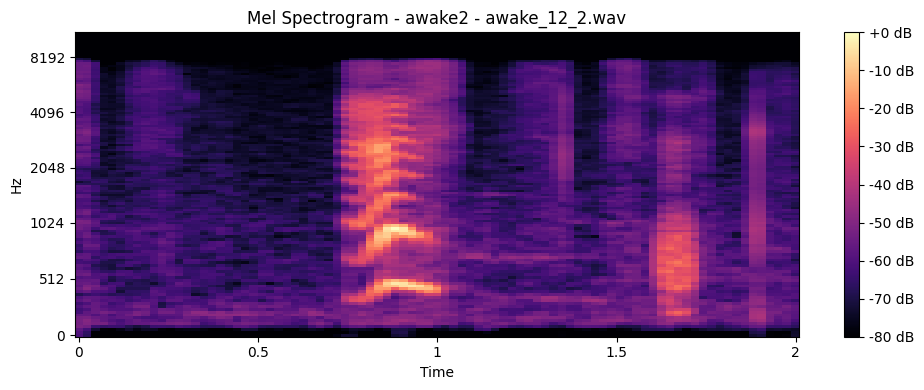

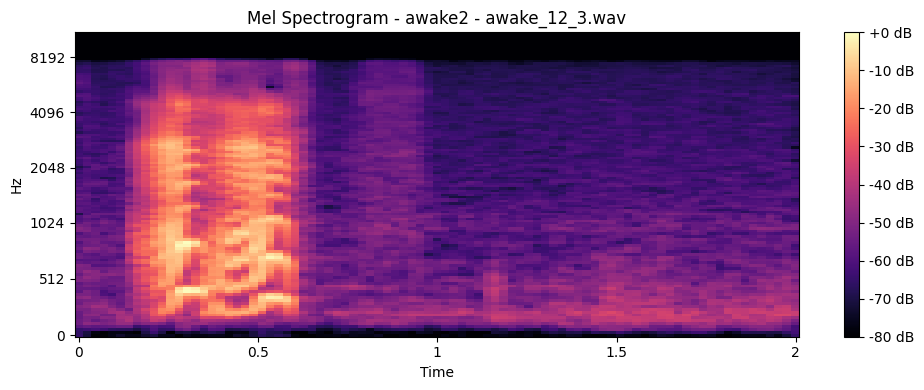

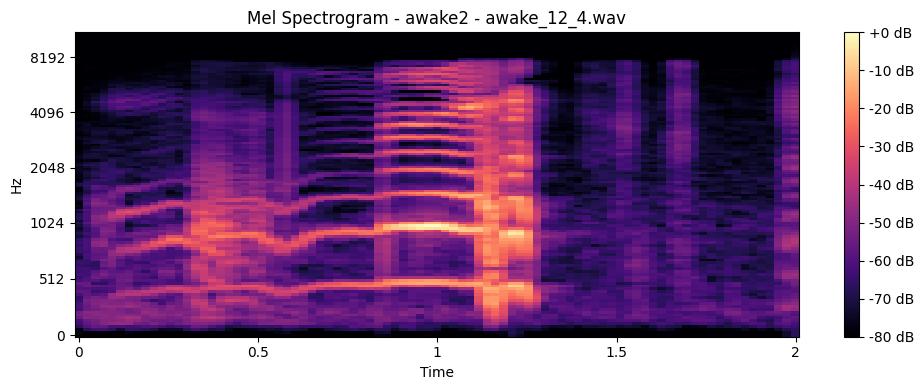

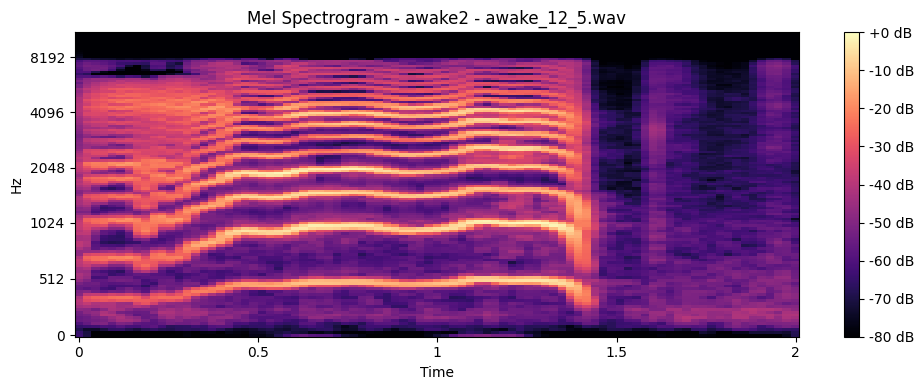

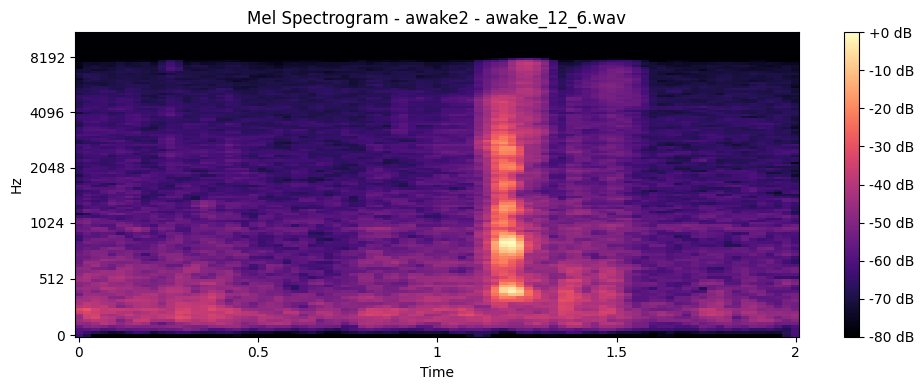

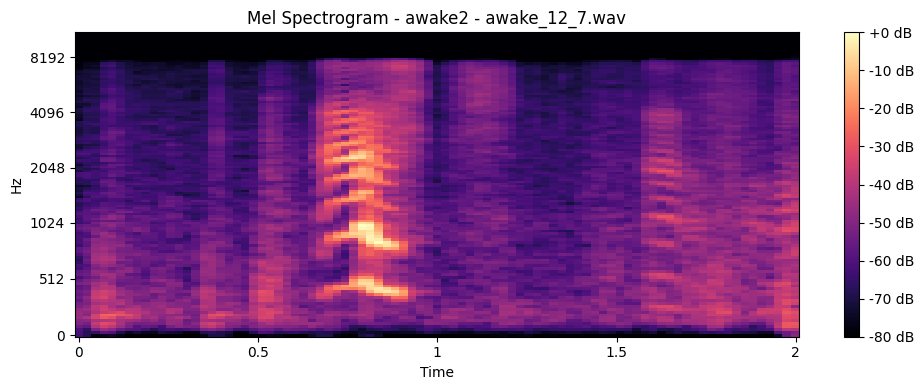

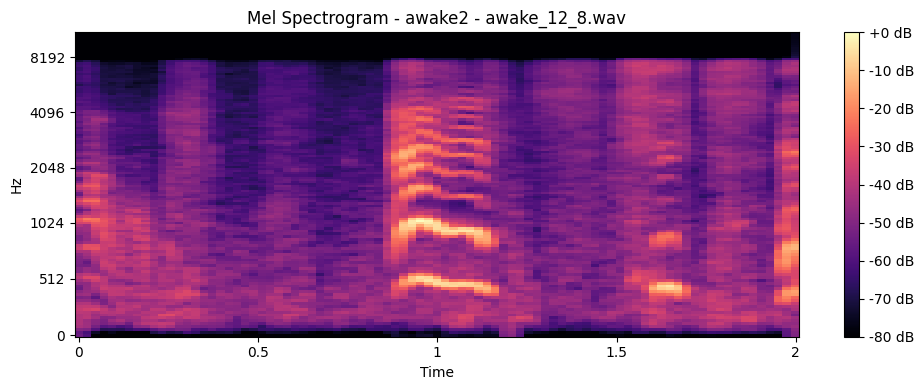

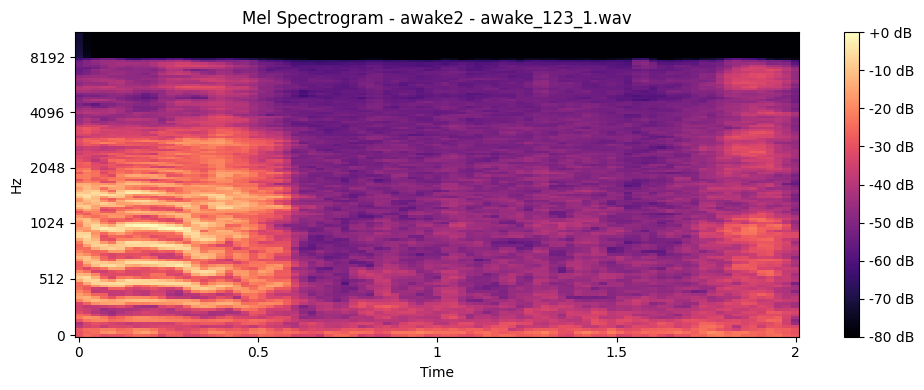

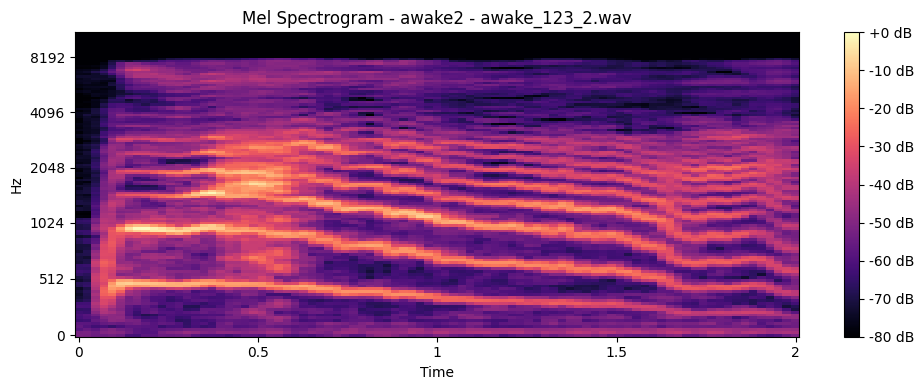

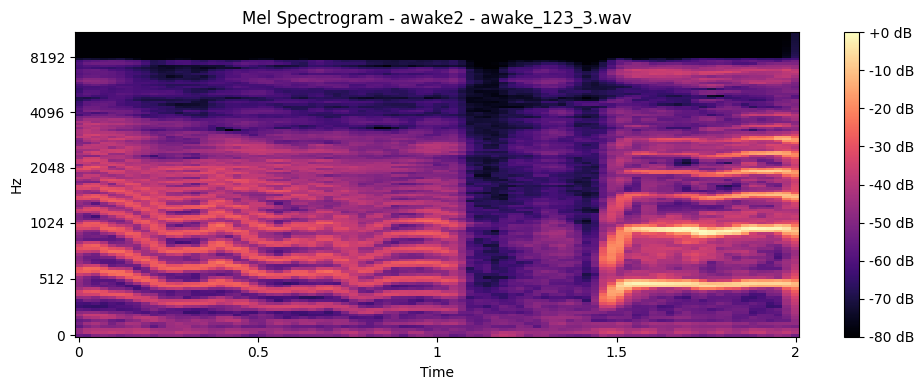

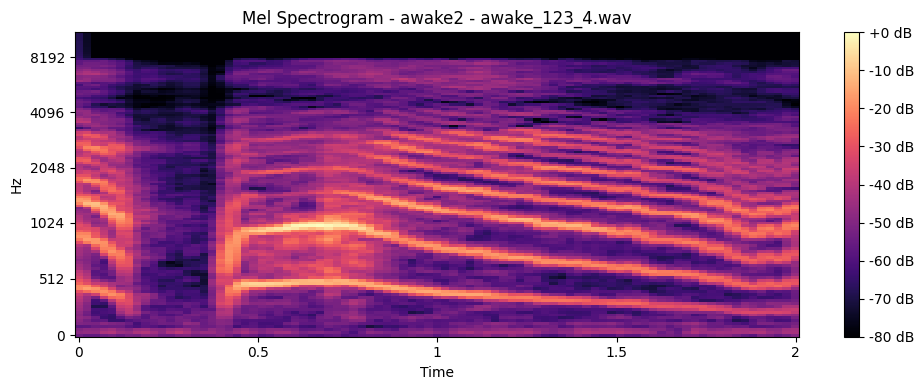

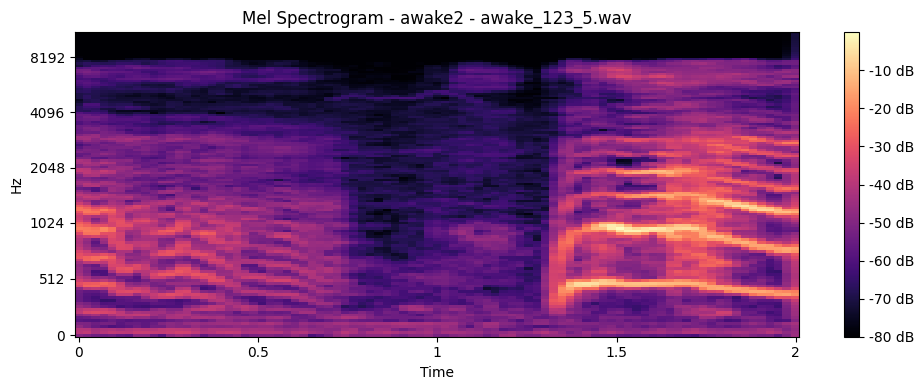

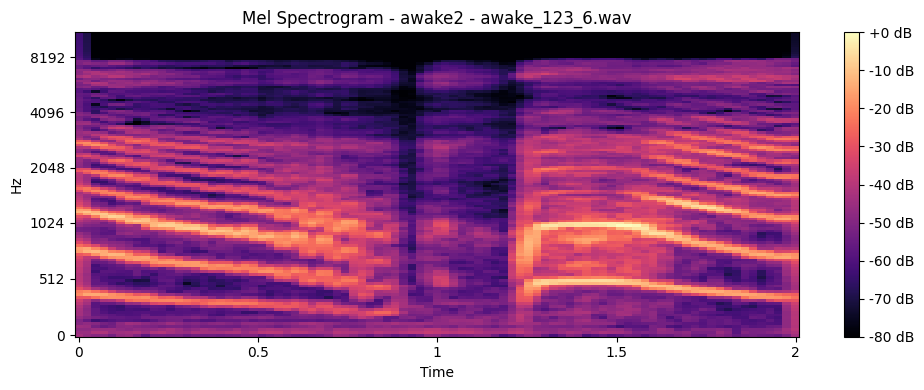

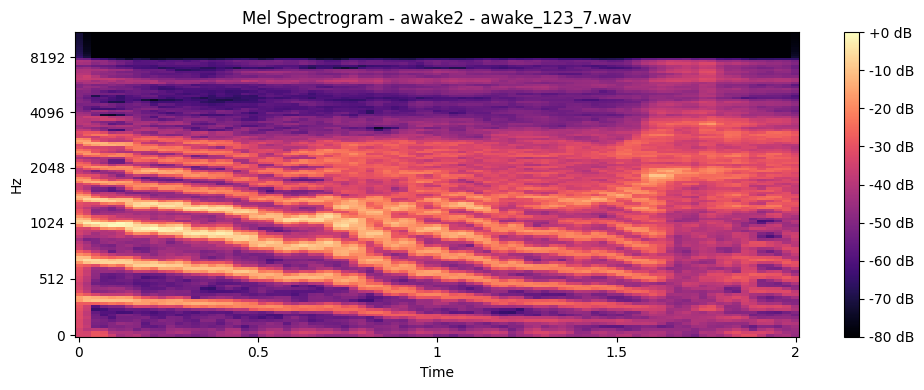

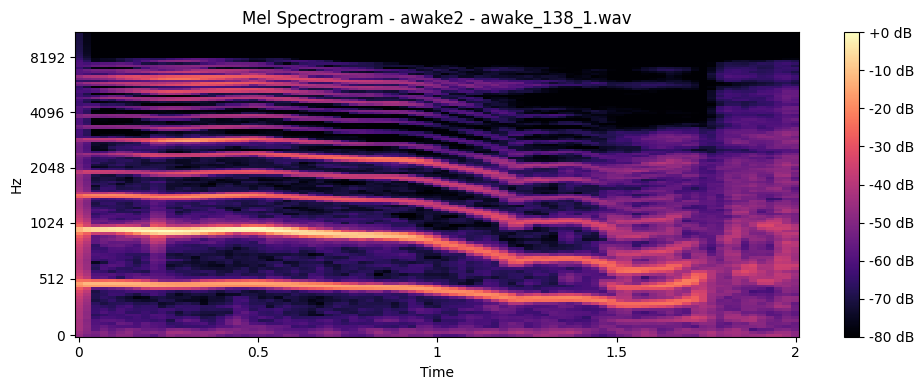

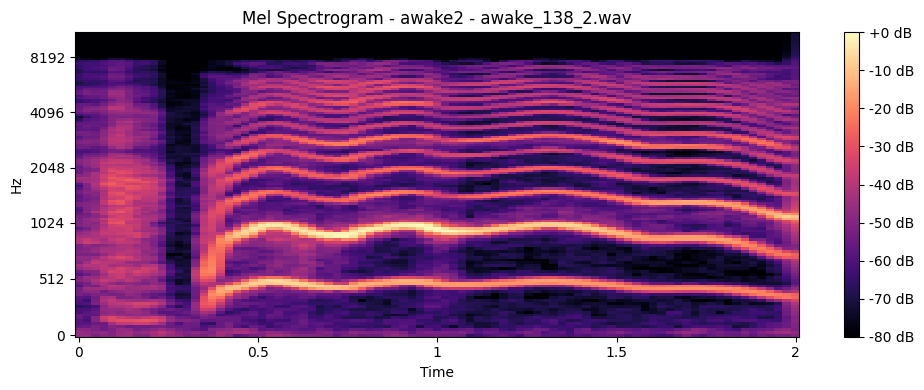

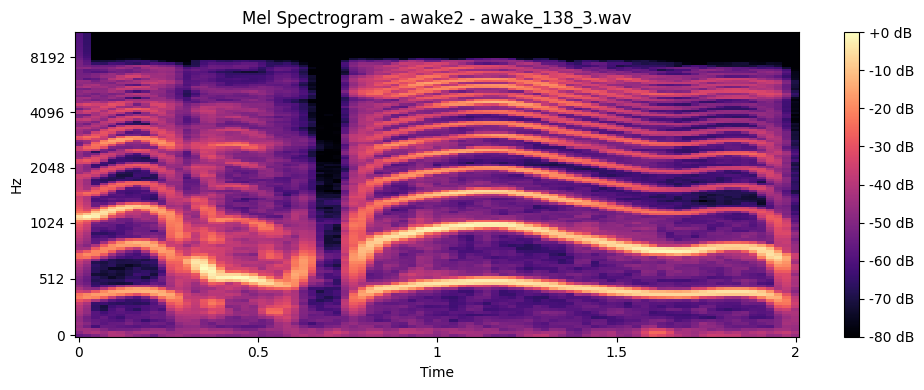

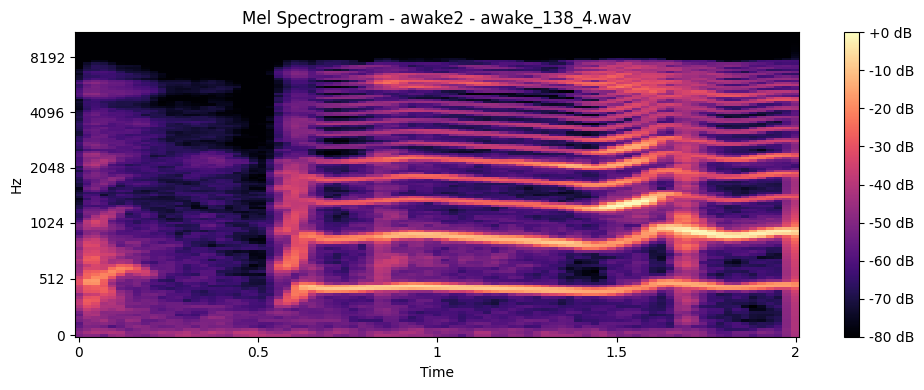

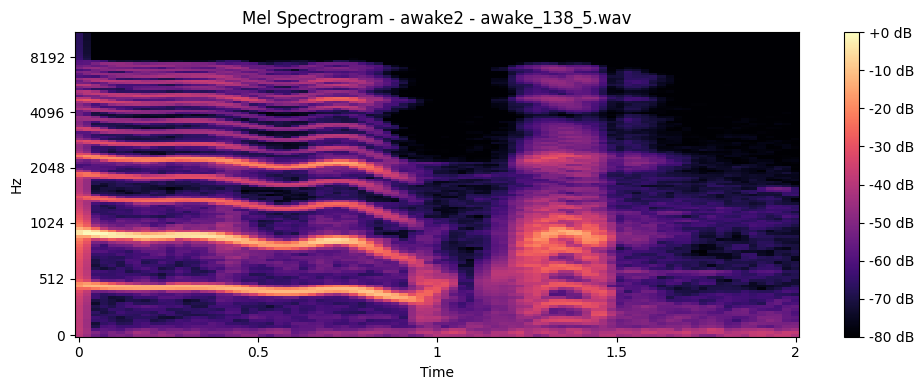

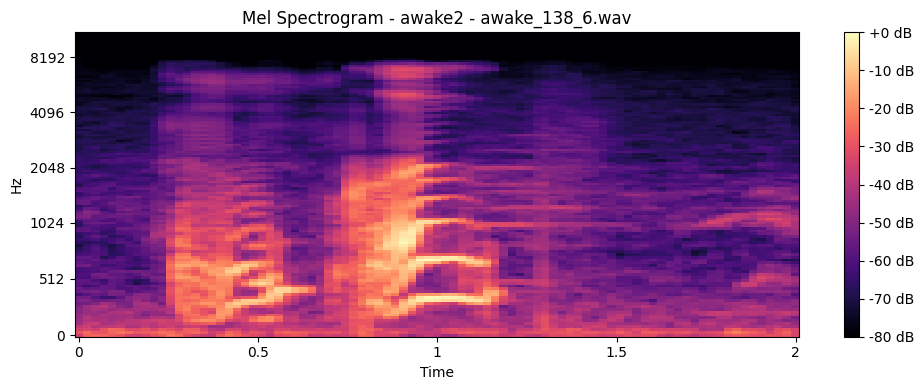

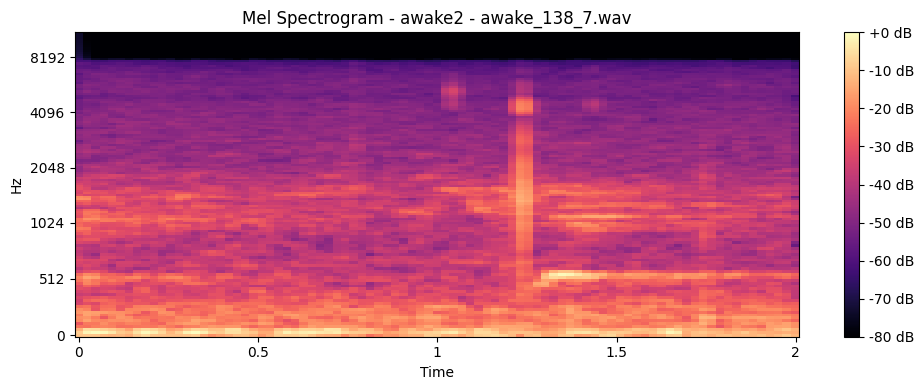

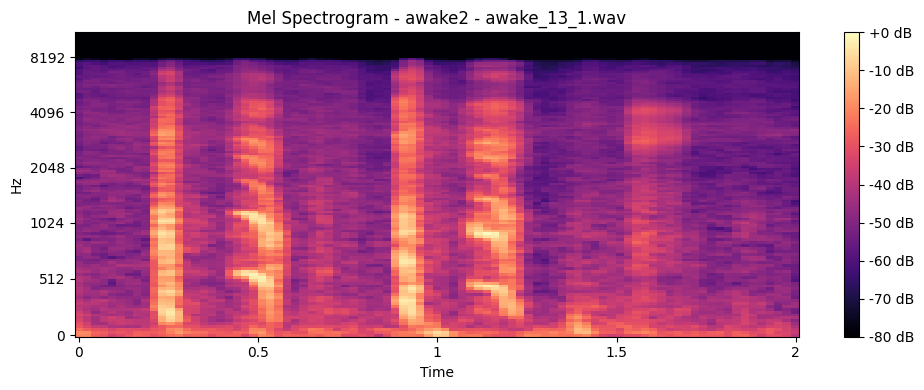

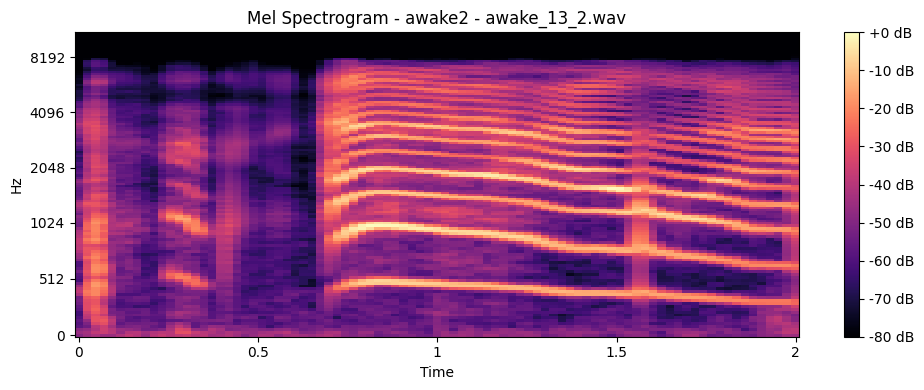

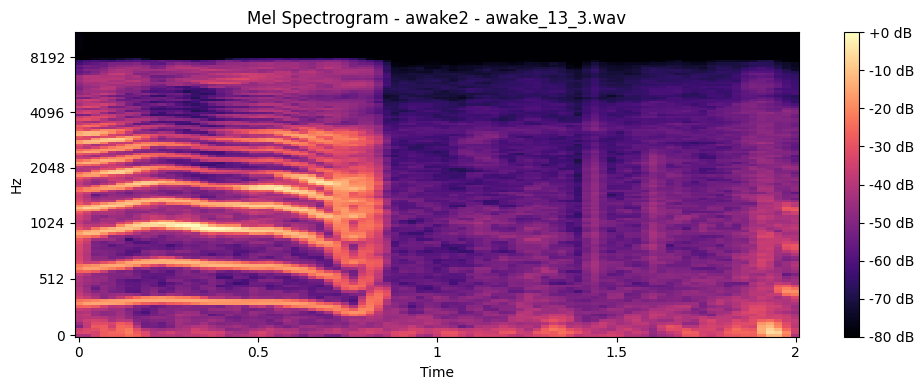

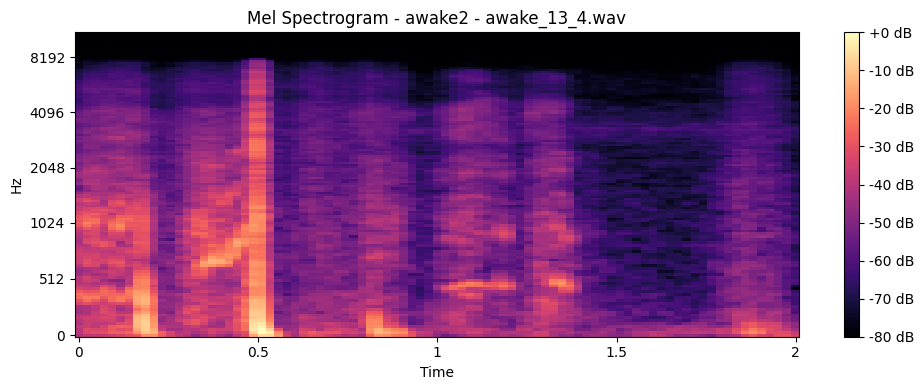

KeyboardInterrupt: ignored

In [ ]:
#멜 스펙트로그램 시각화

import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# 데이터 폴더 경로
data_path = '/content/drive/MyDrive/babycrying/sample2/'

# 분류 레이블
labels = ['awake2', 'hug2', 'hungry2', 'sleepy2', 'uncomfortable2']

# 각 분류별로 멜 스펙트로그램 생성 및 시각화
for label in labels:
    label_path = os.path.join(data_path, label)
    for filename in os.listdir(label_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(label_path, filename)

            # 오디오 파일 로드
            y, sr = librosa.load(file_path)

            # 멜 스펙트로그램 생성
            mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

            # 멜 스펙트로그램 시각화
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max),
                                     y_axis='mel', x_axis='time')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f'Mel Spectrogram - {label} - {filename}')
            plt.tight_layout()
            plt.show()

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 데이터 폴더 경로
data_path = '/content/drive/MyDrive/babycrying/sample2/'

# 수정된 분류 레이블
labels = ['awake2', 'hug2', 'hungry2', 'sleepy2', 'uncomfortable2']

# 데이터 및 레이블 저장을 위한 리스트
data = []
target = []

# 각 분류별로 멜 스펙트로그램 생성 및 데이터 수집
for label in labels:
    label_path = os.path.join(data_path, label)
    for filename in os.listdir(label_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(label_path, filename)

            # 오디오 파일 로드 및 멜 스펙트로그램 생성
            y, sr = librosa.load(file_path)
            mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

            # 멜 스펙트로그램 크기 조정 및 데이터 추가
            if mel_spectrogram.shape[1] >= 128:
                mel_spectrogram = mel_spectrogram[:, :128]
                data.append(mel_spectrogram)
                target.append(label)

# 데이터 전처리
if len(data) > 0:
    data = np.array(data)
    encoder = LabelEncoder()
    target = encoder.fit_transform(target)
    target = tf.keras.utils.to_categorical(target)

    # 훈련 및 테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

    # 모델 설계
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128)),
    tf.keras.layers.Reshape((128, 128, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
    ])

    # 모델 컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # 모델 평가
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
else:
      print("No data found for training.")


0.6505190134048462

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 데이터 폴더 경로
data_path = '/content/drive/MyDrive/babycrying/sample2/'

# 수정된 분류 레이블
labels = ['awake2', 'hug2', 'hungry2', 'sleepy2', 'uncomfortable2']

# 데이터 및 레이블 저장을 위한 리스트
data = []
target = []

# 각 분류별로 멜 스펙트로그램 생성 및 데이터 수집
for label in labels:
    label_path = os.path.join(data_path, label)
    for filename in os.listdir(label_path):
        if filename.endswith('.wav'):
            file_path = os.path.join(label_path, filename)

            # 오디오 파일 로드 및 멜 스펙트로그램 생성
            y, sr = librosa.load(file_path)
            mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

            # 멜 스펙트로그램 크기 조정 및 데이터 추가
            if mel_spectrogram.shape[1] >= 128:
                mel_spectrogram = mel_spectrogram[:, :128]
                data.append(mel_spectrogram)
                target.append(label)

# 데이터 전처리
data = np.array(data)
encoder = LabelEncoder()
target = encoder.fit_transform(target)
target = tf.keras.utils.to_categorical(target)

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# 모델 설계
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128)),
    tf.keras.layers.Reshape((128, 128, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


ValueError: ignored